# Initial Imports and Function Definitions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
def plot_corr(data, title=None):
    """Uses seaborn to plot a correlation matrix of the input data"""
    
    corr_unsorted = data.corr().values
    order = np.array(hierarchy.dendrogram(hierarchy.ward(corr_unsorted), no_plot=True)['ivl'], dtype="int")
    corr = corr_unsorted[order, :][:, order]

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True,
               xticklabels=data.columns[order],
               yticklabels=data.columns[order])
    plt.title(title)

In [3]:
def plot_coef(estimator, features, estimator_name=None, title=None, num_features=None):
    """Function to plot the coefficients of a fitted linear estimator"""
    
    # Grab the estimator from a GridSearchCV object if necessary
    if estimator_name:
        pipe = estimator.best_estimator_
        estimator = pipe.named_steps[estimator_name]
        
    features_short = [x[8:] for x in features]
    
    # Transform for poly feature names if applicable
    try:
        features_final = pipe.named_steps['poly'].get_feature_names(features_short)
    
    except KeyError:
        features_final = features_short
    
    coef_df = pd.DataFrame({
        'feature': features_final,
        'coefficient': estimator.coef_,
        'abs': abs(estimator.coef_)
                           }) \
        .sort_values('abs', ascending=False)
    
    if num_features:
        coef_df = coef_df.iloc[:num_features]
    
#     plt.figure(figsize=(20,10))
#     sns.set()
    return sns.barplot(x='coefficient', y='feature', data=coef_df, orient='h')
#     plt.show()
#     plt.title(title)


In [55]:
def perm_plot(perm, features, title=None):
    """Creates a bar plot of permutation importances from a fitted eli5.sklearn.PermutationImportance object"""
    
    perm_results = np.mean(np.array(perm.results_), axis=0)
    perm_df = pd.DataFrame({
        'feature': [x[8:] for x in features],
        'importance': perm_results
                       }) \
    .sort_values('importance', ascending=False)
    
#     plt.figure(figsize=(20,10))
#     sns.set()
    return sns.catplot(y='feature', x='importance', data=perm_df, kind='bar', orient='h');
#     plt.show()
#     plt.title(title)

# Data Reading and Visualizations

In [5]:
X = pd.read_csv(r'../data/processed/X_priority.csv').iloc[:, 1:]
y = pd.read_csv(r'../data/processed/y_priority.csv').iloc[:, 1]

# Drop null values
X.dropna(how='all', inplace=True)
y = y.reindex_like(X)

In [6]:
print('Check that X and y have the same values after dropping NA values: {}'.format(len(X) == len(y)))

Check that X and y have the same values after dropping NA values: True


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65232 entries, 0 to 65661
Data columns (total 48 columns):
m10_cen_memi_x       60483 non-null float64
t10_cen_blk_ml       65232 non-null float64
t10_gis_area_k       65232 non-null float64
t10_ldb_a60up_c      65232 non-null float64
t10_ldb_a75up_c      65232 non-null float64
t10_ldb_ag25up_c     65232 non-null float64
t10_ldb_asian_p      65232 non-null float64
t10_ldb_col_p        65232 non-null float64
t10_ldb_fb_p         65232 non-null float64
t10_ldb_hh_c         65232 non-null float64
t10_ldb_hinci_m      65232 non-null float64
t10_ldb_hisp_p       65232 non-null float64
t10_ldb_hs_p         65232 non-null float64
t10_ldb_lep_p        65232 non-null float64
t10_ldb_mhmvali_m    65232 non-null float64
t10_ldb_mrenti_m     65232 non-null float64
t10_ldb_multi_p      65232 non-null float64
t10_ldb_nhblk_p      65232 non-null float64
t10_ldb_nhwht_p      65232 non-null float64
t10_ldb_npov_c       65232 non-null float64
t10_ldb_npo

**m10_cen_memi_x** is the only variable that has missing values.

In [8]:
X.describe()

,m10_cen_memi_x,t10_cen_blk_ml,t10_gis_area_k,t10_ldb_a60up_c,t10_ldb_a75up_c,t10_ldb_ag25up_c,t10_ldb_asian_p,t10_ldb_col_p,t10_ldb_fb_p,t10_ldb_hh_c,...,t10_net_hsr_c,t10_net_kct_c,t10_net_liq_c,t10_net_mul_c,t10_net_ngt_c,t10_net_pht_c,t10_net_res_c,t10_net_srv_c,t10_net_wal_c,t10_use_green_k
count,60483.000000,65232.000000,65232.000000,65232.000000,65232.000000,65232.000000,65232.000000,65232.000000,65232.000000,65232.000000,...,65232.000000,65232.000000,65232.000000,65232.000000,65232.000000,65232.000000,65232.000000,65232.000000,65232.000000,65232.000000
mean,1.101632,0.054964,110.210846,816.220337,264.251594,2881.464511,0.043259,0.269761,0.122891,1620.049117,...,0.597713,0.093126,0.634698,1.399402,1.197621,0.622146,0.946578,2.939404,82.854915,100.131983
std,0.302166,0.129193,564.415005,436.953493,183.576128,1259.530055,0.083240,0.180497,0.137796,697.086754,...,0.958337,1.204615,0.960206,1.700164,1.890396,1.108233,1.462344,3.843438,63.764504,539.802221
min,1.000000,0.001291,0.008299,9.000000,0.000000,247.000000,0.000000,0.000000,0.000000,22.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.015574,1.914044,507.000000,139.000000,1987.000000,0.001338,0.132653,0.023548,1124.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,42.800000,0.017100
50%,1.000000,0.022777,5.213225,744.000000,225.000000,2720.000000,0.012913,0.218988,0.068957,1529.000000,...,0.000000,0.000000,0.000000,1.000000,0.800000,0.000000,0.400000,1.800000,67.000000,1.039203
75%,1.000000,0.038714,37.720683,1040.000000,344.000000,3582.000000,0.046191,0.369536,0.173442,2011.000000,...,1.000000,0.000000,1.000000,2.000000,1.800000,1.000000,1.400000,3.800000,103.400000,27.865246
max,2.000000,3.978858,24676.908121,9614.000000,3014.000000,21414.000000,0.920511,0.946194,0.867325,11696.000000,...,48.000000,293.600000,25.600000,41.600000,111.000000,21.600000,76.800000,114.800000,1634.400000,24315.575822


In [9]:
X.shape

(65232, 48)

## Visualizations

### Target

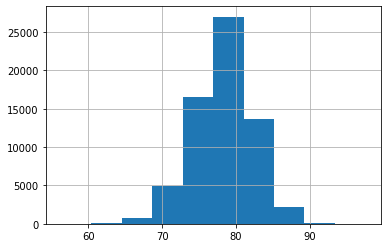

In [10]:
y.hist();

Our target actually looks pretty close to normally distributed which will likely be helpful for linear methods

### Continuous Features 

In [11]:
bin_features = "m10_cen_memi_x"
cont_features = [x for x in X.columns.tolist() if x !=bin_features]

#### Distributions

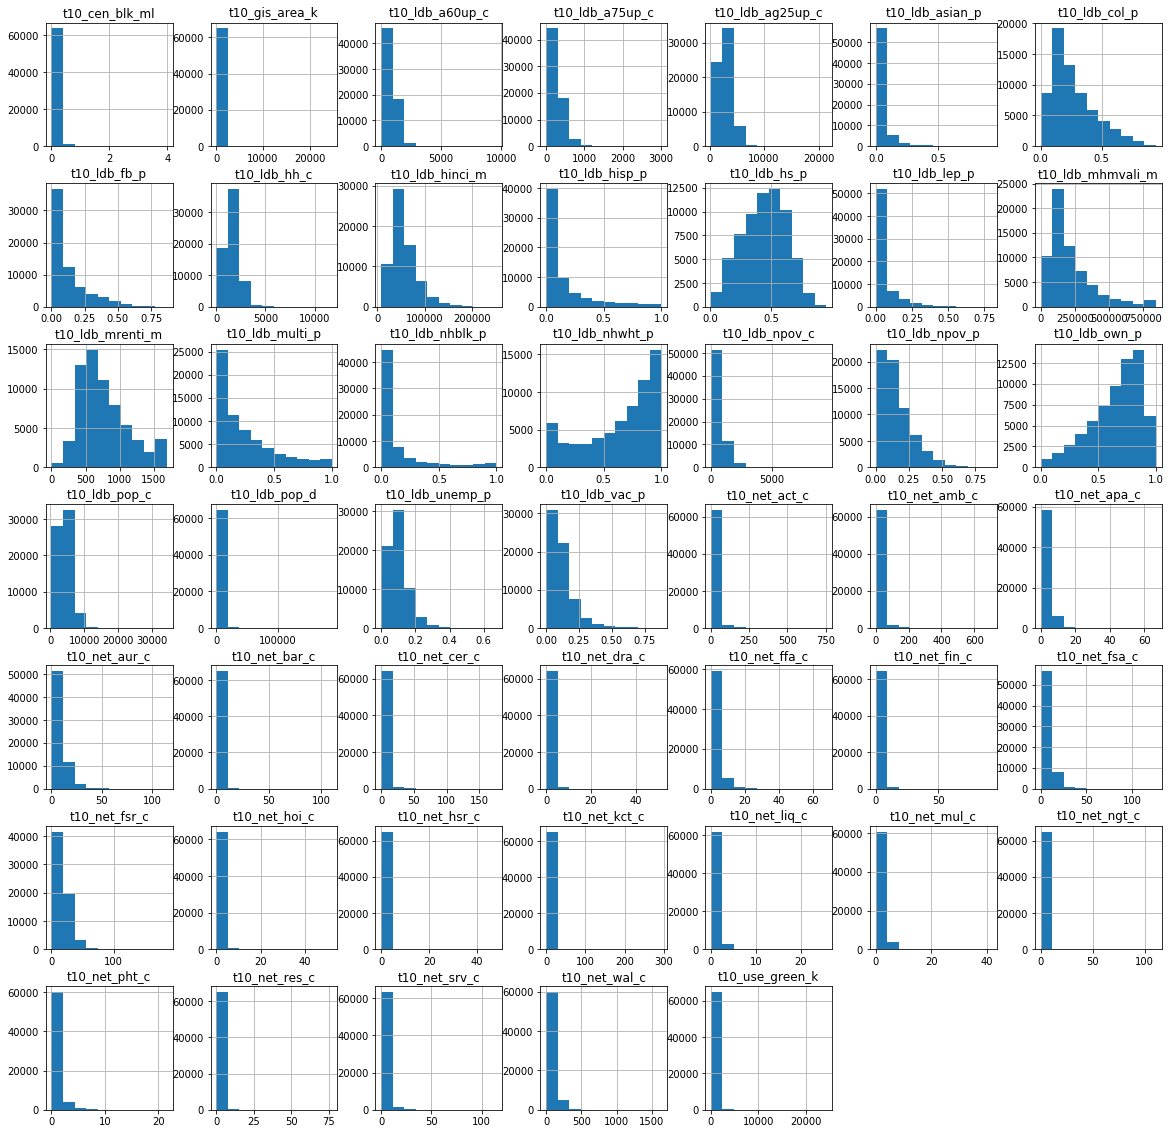

In [12]:
X[cont_features].hist(figsize=(20,20));

A lot of these distributions have very strong left skew, and look vaguely exponential. A few of them look like they may be normal. NETS variables are the most strikingly right skewed, with the vast majority of tracts having a very small number of each kind of business.  

The LTDB variables are not quit as striking, and seem to have a lot more tract-level variety. 

### Categorical Feature(s) \[Needs filling in\]

The only binary feature is m10_cen_memi_x.

### Feature-wise Plots vs Target

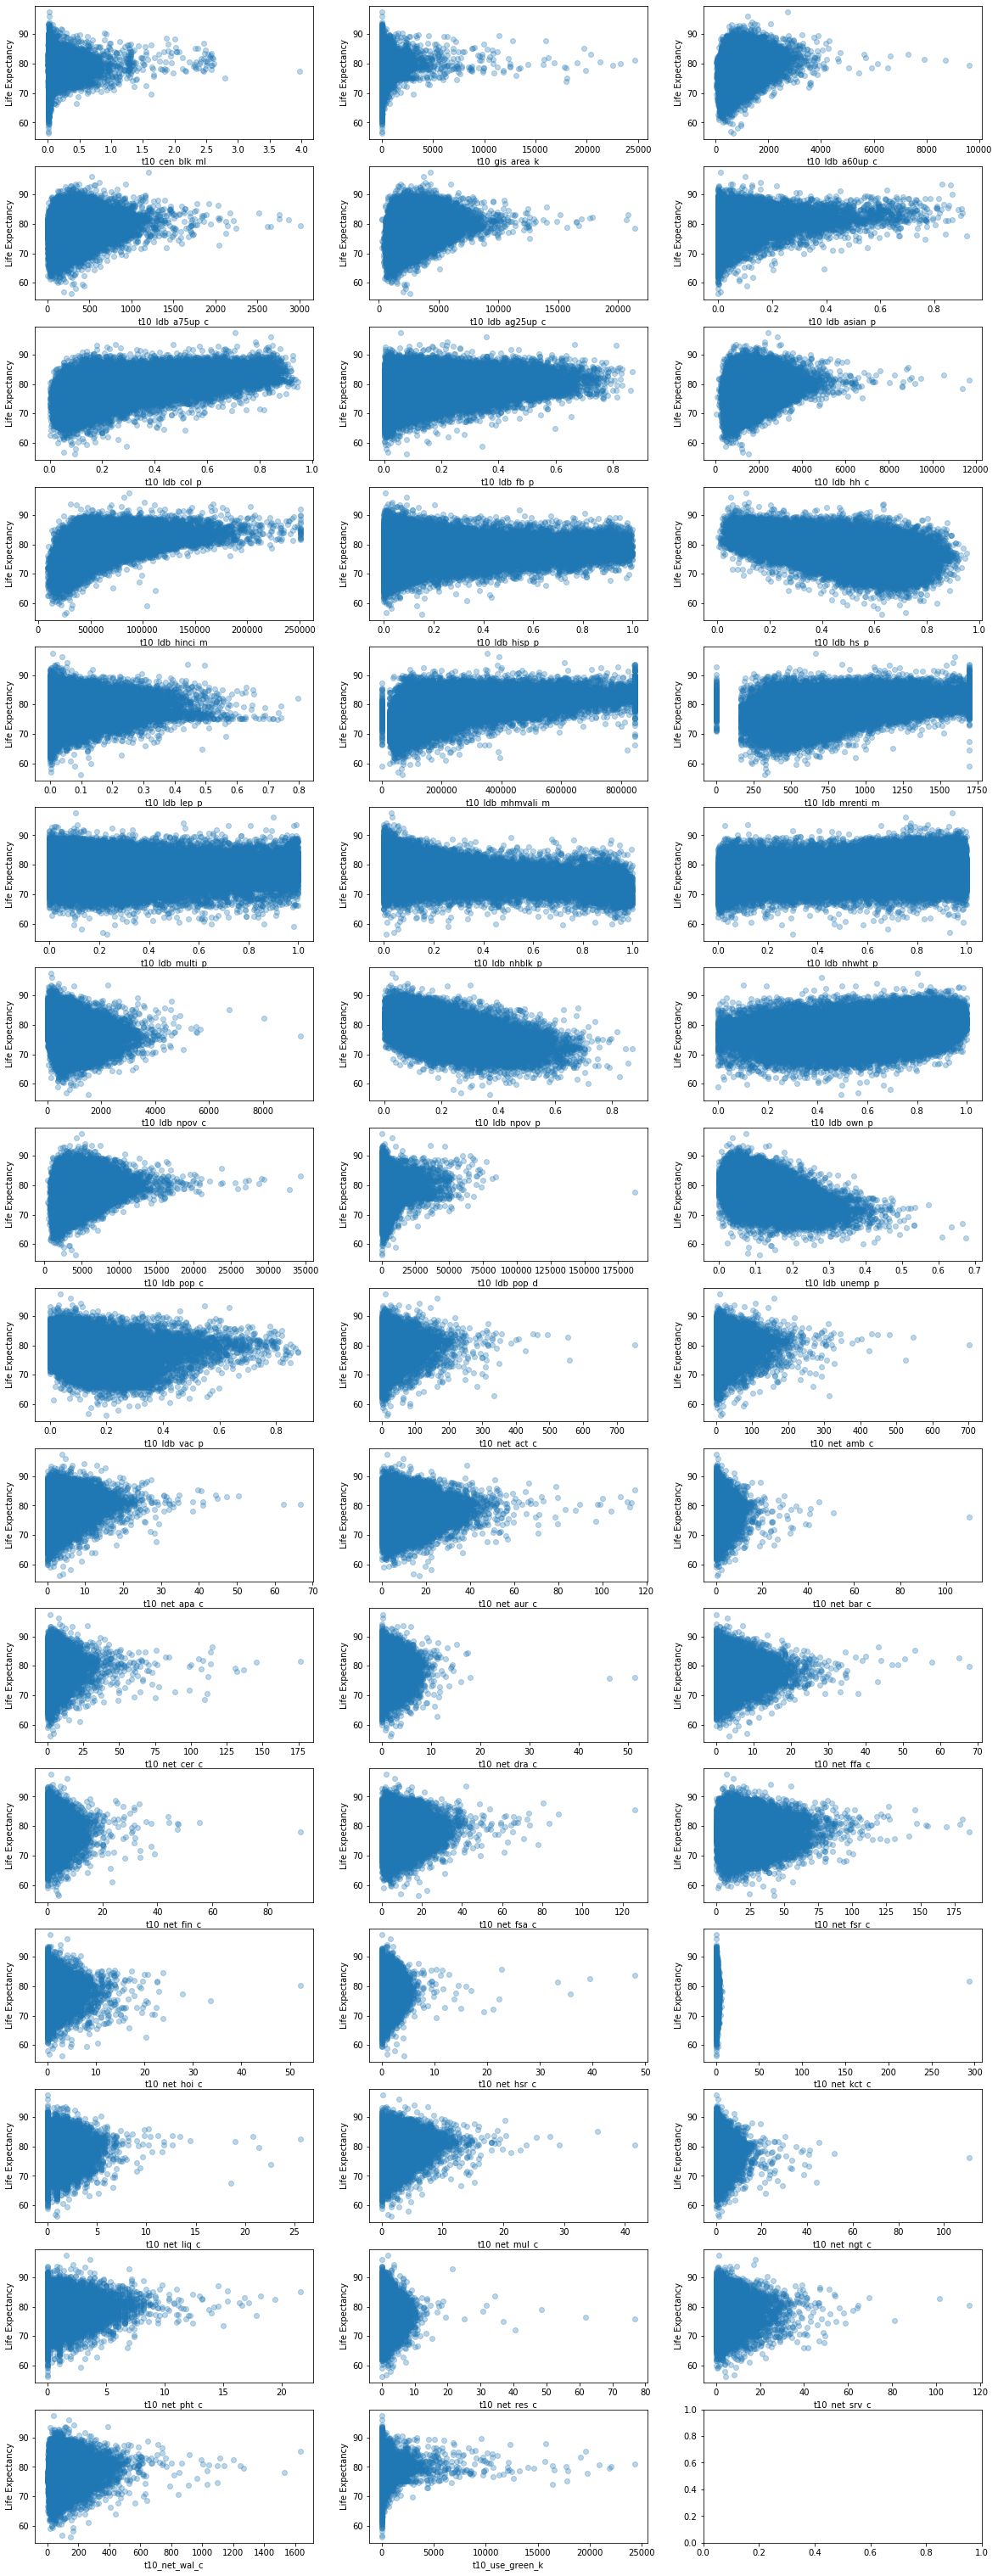

In [13]:
nrows=16
ncols=3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,55));
k = 0
for i in range(nrows):
    for j in range(ncols):
        try:
            feature = X[cont_features].iloc[:, k]
            axes[i, j].set(xlabel=feature.name,
                          ylabel="Life Expectancy");
            axes[i, j].scatter(x=feature, y=y, alpha=0.3);
            k += 1
        except IndexError:
            break

Many of these plots, **especially** the NETS ones, show heteroskedacicity.  We're not very concerened with p-values and confidence intervals so it may not be a problem but it is definitely something to note.

### Collinearities

We're expecting a lot of collinearity, especially within LTDB and census varuables. I attempted a pairplot, but there were too many variables for this to be useful.

# Analysis

In [14]:
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from eli5 import explain_weights, show_weights
from eli5.sklearn import PermutationImportance

from scipy.cluster import hierarchy

## Split Data

In [15]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X[cont_features], y, random_state=0)

# Define a repeatable Cross-Validation Generator
cv_5 = KFold(n_splits=5, shuffle=True, random_state=42)

## Single Variables

In [16]:
results = {}
for col in cont_features:
    lr = LinearRegression()
    score = cross_val_score(lr, X_train[col].values.reshape(-1,1), y_train, cv=cv_5, scoring='r2')
    results[col] = np.mean(score)

results_df = pd.Series(results).sort_values(ascending=False)

In [17]:
results_df

t10_ldb_hinci_m      0.362936
t10_ldb_col_p        0.336860
t10_ldb_npov_p       0.325977
t10_ldb_hs_p         0.309967
t10_ldb_mhmvali_m    0.300101
t10_ldb_mrenti_m     0.236201
t10_ldb_unemp_p      0.213727
t10_ldb_nhblk_p      0.190544
t10_ldb_npov_c       0.128464
t10_ldb_own_p        0.087955
t10_ldb_asian_p      0.086899
t10_ldb_vac_p        0.070037
t10_net_apa_c        0.063272
t10_ldb_ag25up_c     0.062519
t10_ldb_fb_p         0.056720
t10_ldb_nhwht_p      0.053983
t10_ldb_a60up_c      0.053701
t10_net_mul_c        0.040786
t10_ldb_pop_c        0.037579
t10_ldb_hh_c         0.036678
t10_ldb_a75up_c      0.029803
t10_net_amb_c        0.019175
t10_net_pht_c        0.019052
t10_net_act_c        0.017380
t10_net_cer_c        0.011722
t10_net_wal_c        0.006925
t10_ldb_pop_d        0.005403
t10_net_res_c        0.002687
t10_net_ngt_c        0.002504
t10_ldb_multi_p      0.002454
t10_ldb_lep_p        0.002426
t10_net_bar_c        0.002283
t10_net_fsr_c        0.002162
t10_cen_bl

We have some pretty good univariate predictors.  As expected, all of the top performers are LTDB variables.  The following LTDB variables all produce an R<sup>2</sup> of > 0.3:
* **hinci_m**: Median household income
* **col_p**: Percent of persons with at least a 4-year college degree
* **npov_p**: Percent of persons in poverty
* **hs_p**: Percent of persons with a high school degree or less
* **mhmvali_m**: Medidan home value (inflation-adjusted)

I suspect that many of these variables will be highly correlated, so I'll look at a covariance matrix.

In [18]:
high_r_cols = results_df[results_df > .3].index

In [19]:
X_train[high_r_cols].corr()

,t10_ldb_hinci_m,t10_ldb_col_p,t10_ldb_npov_p,t10_ldb_hs_p,t10_ldb_mhmvali_m
t10_ldb_hinci_m,1.000000,0.753253,-0.695272,-0.714248,0.681087
t10_ldb_col_p,0.753253,1.000000,-0.524290,-0.906527,0.667029
t10_ldb_npov_p,-0.695272,-0.524290,1.000000,0.600343,-0.378111
t10_ldb_hs_p,-0.714248,-0.906527,0.600343,1.000000,-0.563265
t10_ldb_mhmvali_m,0.681087,0.667029,-0.378111,-0.563265,1.000000


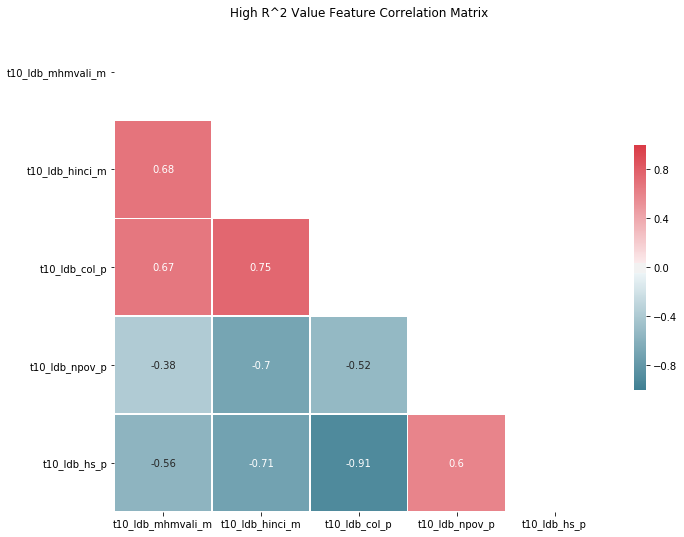

In [20]:
plot_corr(X_train[high_r_cols], title='High R^2 Value Feature Correlation Matrix')

We do see some pretty high correlations, but not as high as I was expecting in most cases. The highest is a negative correlation between the  number of percent of people with at least a college degree and the percent of people with at most a high school degree, which are obviously in direct opposition.  There's also a pretty strong positive correlation between college degrees and median household income, which once again isn't surprising and I imagine most of these things are pretty well studied already.  

# Phase 1

Features will only include the intersection of Census and ACS variables used in USALEEPs model to impute life expectancy for age-bands with death counts of 0 and those which are found in the RECVD priority dataset. These include median household income, population density, and the proportions of the population that are non-Hispanic black, Hispanic, and had a 4-year college degree or higher in the census tract.

**Full variable names**:
- t10_ldb_hinc_m
- t10_ldb_pop_d
- t10_ldb_nhblk_p
- t10_ldb_hisp_p
- t10_ldb_col_p


In [21]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Linear Models

We'll create a phase 1 model using Ridge regression, LASSO regression, and ElasticNet. The baseline model will include all variables except NETS variables. We'll try both StandardScaler and RobustScaler (which uses the median and quartiles to reduce the influence of outliers on scaling). Due to the high correlation between variables, we won't use standard Ordinary Least Squares Regression as we won't be able to trust the coefficients, which is our initial method of identifying variable importance.

In [51]:
def linear_model(estimator, param_grid, cv, X_train, y_train, phase):
    """Functional code to perform all operations for a Linear Model and return a fitted GridSearchCV
    
    Keyword Arguments:
    estimator -- The scikit-learn estimator to use
    param_grid -- Dict object detailing parameters for the model
    cv -- the cross-validation generator object
    X_train -- training data features
    y_train -- training data outcome
    phase -- Which phase of analysis this is for labeling charts, as a string (Ex: 1)
    """
    
    est_str = str(estimator)
    est_name = est_str[:est_str.index('(')]
    
    pipe = Pipeline([
        ('poly', PolynomialFeatures()),
        ('scaler', StandardScaler()),
        ('estimator', estimator)
    ])
    
    grid = GridSearchCV(pipe, param_grid, cv=cv, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    train_results = pd.DataFrame(grid.cv_results_)
    
    #get the best linear estimator for comparison
    lin_best = train_results[train_results['param_poly__degree'] == 1] \
    .sort_values('rank_test_score') \
    .iloc[0] \
    .mean_test_score
    
    # Print results
    print(
    "Phase 1 {} R^2 Value: {}\n\
Best Parameters: {}\n\n\
Best R^2 Value with No Polynomial Features or Interactions: {}\n" \
    .format(est_name, grid.best_score_, grid.best_params_, lin_best)
)
    
#     Coefficient graphs
    plt.figure(figsize=(20,10));
    sns.set()
    coef_plot = plot_coef(grid,
              X_train.columns,
              estimator_name='estimator',
              num_features=20)
    plt.title('Phase 1 {} Coefficients'.format(est_name))
    plt.show()
   
    
    #permutation importance
    perm = PermutationImportance(grid.best_estimator_, scoring='r2') \
        .fit(X_train, y_train, cv='prefit')
    
    plt.figure(figsize=(20,10));
    plot_perm = perm_plot(perm, X_train.columns.tolist())
    plt.title('Phase {} {} Permutation Importance'.format(phase, est_name))
    plt.show()
    
    display(show_weights(perm, feature_names=X_train.columns.tolist()))    
    
    return grid

In [23]:
p1_features = ['t10_ldb_hinci_m',
    't10_ldb_pop_d',
    't10_ldb_nhblk_p',
    't10_ldb_hisp_p',
    't10_ldb_col_p']

Correlation matrix for Phase 1 Features

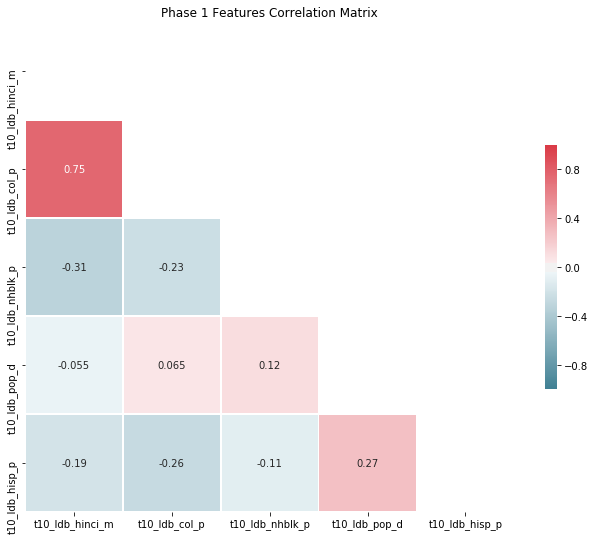

In [24]:
plot_corr(X_train[p1_features], title='Phase 1 Features Correlation Matrix')

There's a 0.75 correlation between median household income and percent with a four year degree, which is pretty obvious and to be expected.  Other than this the correlations between variables aren't as drastic as I had imagined

### LASSO Regression

Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients. This type of regularization can result in sparse models with few coefficients; Some coefficients can become zero and eliminated from the model. Larger penalties result in coefficient values closer to zero, which is the ideal for producing simpler models.

![alt text](https://qph.fs.quoracdn.net/main-qimg-2a88e2acc009fa4de3edeb51e683ca02.webp)

As shown in the image, the nature of the l1 norm function and its use of the absolute value drives coefficients directly to 0, while l2 norm used for ridge regression just drives them *close* to 0.  

I'll be gridsearching for the optimum $\alpha$ parameter on a log scale.

Phase 1 Lasso R^2 Value: 0.5559154032722687
Best Parameters: {'estimator__alpha': 0.001, 'poly__degree': 3}

Best R^2 Value with No Polynomial Features or Interactions: 0.49062224211745786



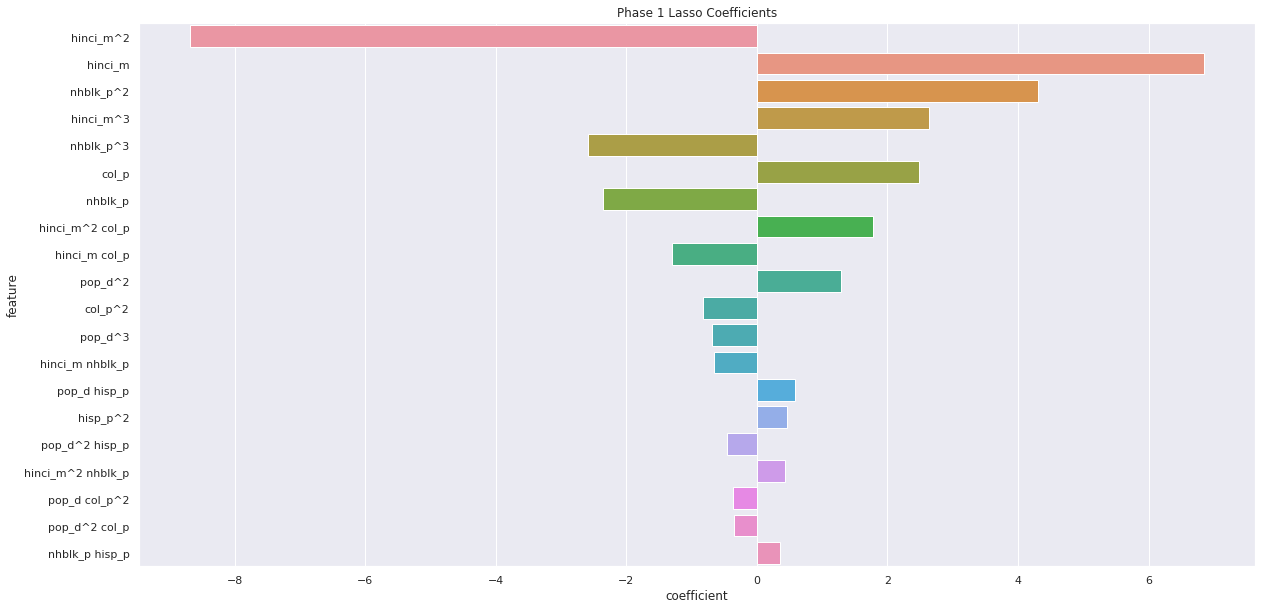

<Figure size 1440x720 with 0 Axes>

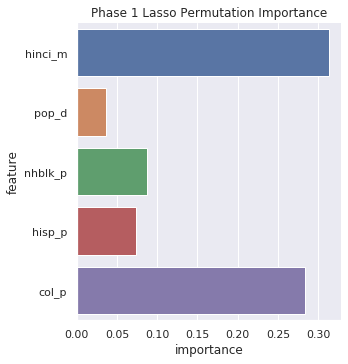

Weight,Feature
0.3132 ± 0.0036,t10_ldb_hinci_m
0.2837 ± 0.0039,t10_ldb_col_p
0.0874 ± 0.0050,t10_ldb_nhblk_p
0.0743 ± 0.0203,t10_ldb_hisp_p
0.0363 ± 0.0048,t10_ldb_pop_d


In [25]:
lasso_grid = {
    'estimator__alpha': np.logspace(-3, 3, 5),
    'poly__degree': [1, 2, 3]
             }
p1_lasso = linear_model(Lasso(), lasso_grid, cv_5, X_train[p1_features], y_train, '1');

Our best model used the smallest regularization parameter.  we also see a .065 increase in R^2 when we use a model with 3rd order polynomials and interaction terms.

The previous conclusion is emphasized by viewing the coefficients; LASSO has set none of them to zero.

Permutation importances largely agree with the LASSO Coefficients as effect estimates, assigning high importances to median household income, percentage of those with a 4-year degree or higher, and proportion of non-hispanic black residents. This also has an interpretability advantage that it assigns importance based on the original features despite us using polynomial features and interactions.  This is because in computing the permutation importance, each feature is randomly permuted before polynomial features and itneractions are taken.

#### Permutation Importance

from [eli5](https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html)  

**Algorithm:**  
The idea is the following: feature importance can be measured by looking at how much the score (accuracy, F1, R^2, etc. - any score we’re interested in) decreases when a feature is not available.

To do that one can remove feature from the dataset, re-train the estimator and check the score. But it requires re-training an estimator for each feature, which can be computationally intensive. Also, it shows what may be important within a dataset, not what is important within a concrete trained model.

To avoid re-training the estimator we can remove a feature only from the test part of the dataset, and compute score without using this feature. It doesn’t work as-is, because estimators expect feature to be present. So instead of removing a feature we can replace it with random noise - feature column is still there, but it no longer contains useful information. This method works if noise is drawn from the same distribution as original feature values (as otherwise estimator may fail). The simplest way to get such noise is to shuffle values for a feature, i.e. use other examples’ feature values - this is how permutation importance is computed.

### Ridge

Ridge regression performs L2 regularization, which adds a penalty equal to the square of the magnitude of coefficients. This type of regularization will push values very close to 0, but will none will actually reach 0. Larger penalties result in coefficient values closer to zero, which is the ideal for producing simpler models.

Refer to the image shown in the LASSO section: the nature of the l1 norm function and its use of the absolute value drives coefficients directly to 0, while l2 norm used for ridge regression just drives them *close* to 0.  

I'll be using the gridsearching for the optimum $\alpha$ parameter on a log scale.

Phase 1 Ridge R^2 Value: 0.5577508976027857
Best Parameters: {'estimator__alpha': 1.0, 'poly__degree': 3}

Best R^2 Value with No Polynomial Features or Interactions: 0.49062218389789464



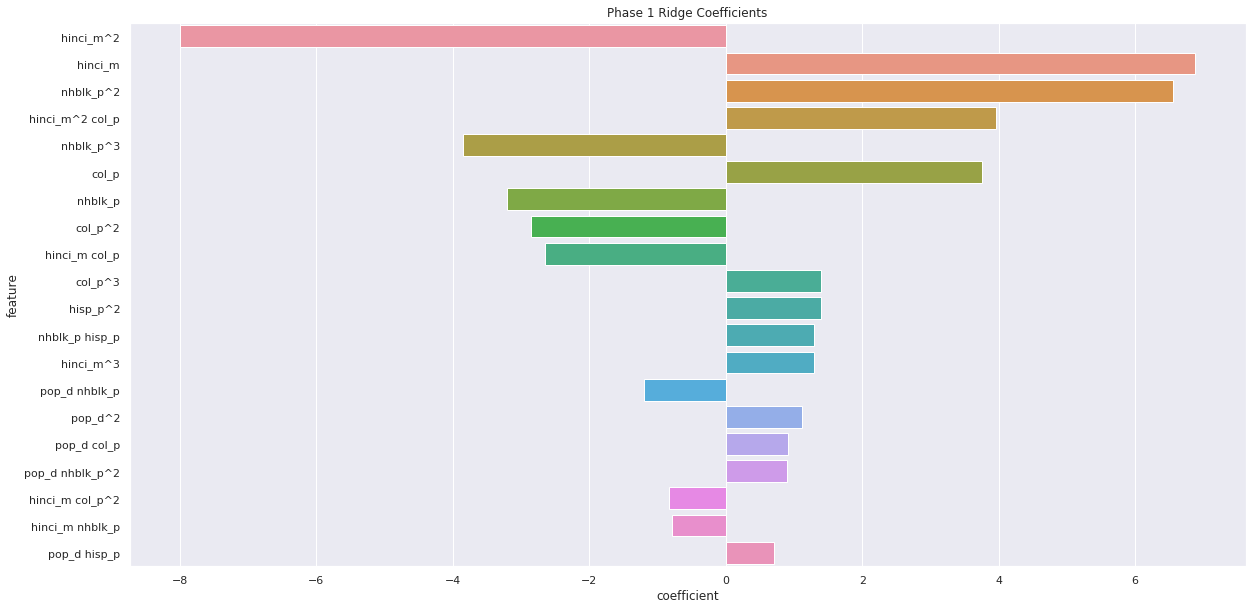

<Figure size 1440x720 with 0 Axes>

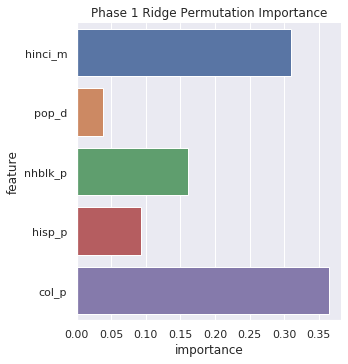

Weight,Feature
0.3645 ± 0.0057,t10_ldb_col_p
0.3097 ± 0.0046,t10_ldb_hinci_m
0.1607 ± 0.0156,t10_ldb_nhblk_p
0.0934 ± 0.0092,t10_ldb_hisp_p
0.0385 ± 0.0064,t10_ldb_pop_d


In [26]:
ridge_grid = {
    'estimator__alpha': np.logspace(-3, 3, 5),
    'poly__degree': [1, 2, 3]
             }
p1_ridge = linear_model(Ridge(), ridge_grid, cv_5, X_train[p1_features], y_train, '1');

As expected, results are nearly identical to LASSO. The ridge model performs the same both linearly and with polynomial features. One notable difference in that percent of persons with college degrees surpasses median household income as the most important feature by permutation importance, but they were very close to begin with. There are some small differences in coefficient weights and what is represented for polynomial features but in general things are very similar.

### ElasticNet

![](https://miro.medium.com/max/4200/0*kuuC8_3Q2YjoLoqt.png)

ElasticNet uses the sum of the L1 and L2 norms and acts as a compromise between Ridge and LASSO. Coefficients will sometimes be set to 0, but less commonly than with LASSO.

Phase 1 ElasticNet R^2 Value: 0.5559771824223213
Best Parameters: {'estimator__alpha': 0.001, 'estimator__l1_ratio': 0.75, 'poly__degree': 3}

Best R^2 Value with No Polynomial Features or Interactions: 0.49062224211745786



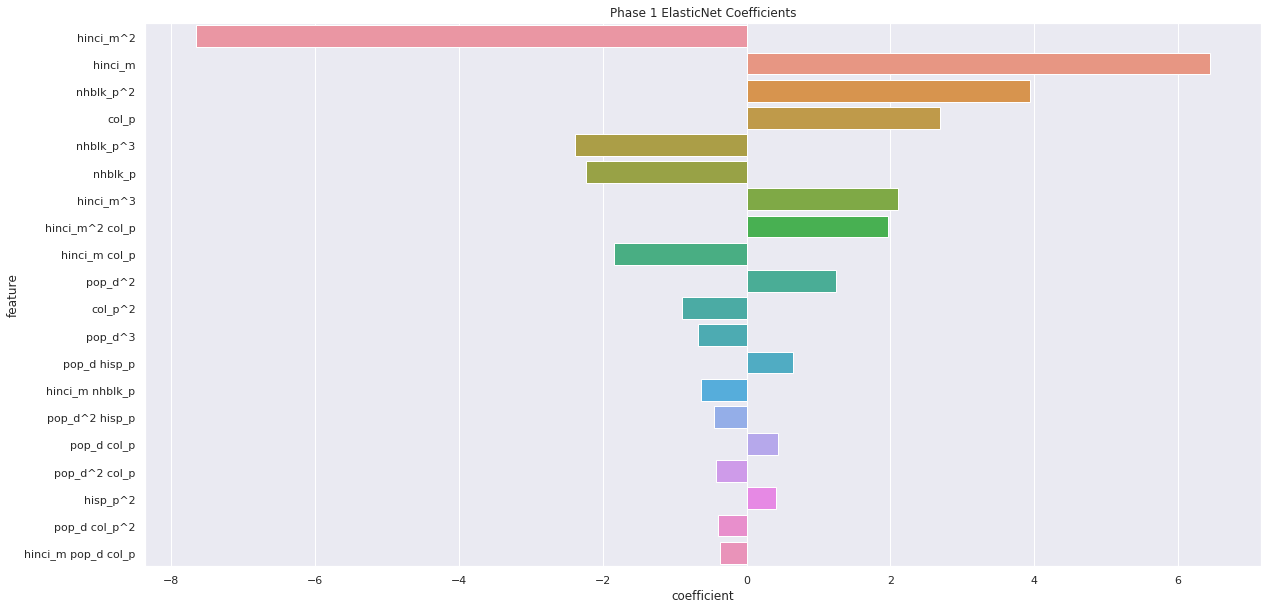

<Figure size 1440x720 with 0 Axes>

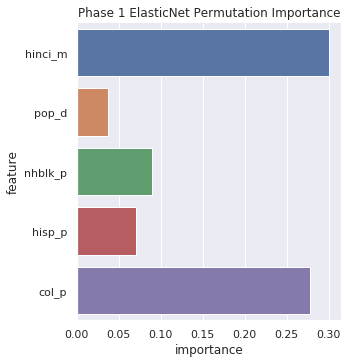

Weight,Feature
0.3001 ± 0.0059,t10_ldb_hinci_m
0.2783 ± 0.0057,t10_ldb_col_p
0.0899 ± 0.0150,t10_ldb_nhblk_p
0.0709 ± 0.0061,t10_ldb_hisp_p
0.0372 ± 0.0081,t10_ldb_pop_d


In [27]:
elastic_grid = {
    'estimator__alpha': np.logspace(-3, 3, 5),
    'estimator__l1_ratio': np.linspace(0, 1, 5),
    'poly__degree': [1, 2, 3]
             }
p1_elastic = linear_model(ElasticNet(), elastic_grid, cv_5, X_train[p1_features], y_train, '1');

Basically the same as the other linear methods

## Nonlinear Models
### Random Forests

![](https://miro.medium.com/max/1184/1*i0o8mjFfCn-uD79-F1Cqkw.png)

A random forrest is an ensemble classifier/regressor of bad decision trees which average to (hopefully) be a good classfier/regressor. The idea is that although each of these small decision trees perform badly, they all capture *different* information and so average to be a good model of the data. The number of trees in the forest is a hyperparameter, as well as the max depth of the trees. Randomness is injected into these trees in two ways:

1. Bagging (Bootstrap Aggregation).  Each tree is trained on a different bootstrapped sample from our training data.
2. Restricting number of features each tree can be trained on.  Each tree is only allowed to train on a randomly selected set of features.  The number of features is a hyperparameter.

The final classification is made by averaging the individual classifications of each tree in the forest. 

In [28]:
from sklearn.ensemble import RandomForestRegressor
InteractiveShell.ast_node_interactivity = 'last_expr'

## Find the Correct Number of Trees

More trees in your forest can never *hurt* performance, but eventually you reach a point of diminishing returns where you spend extra time training for very little boost in performance.  We'll evaluate performance while adding trees to see how many we need for this problem.

In [37]:
%%capture

train_scores = []
oob_scores = []
test_scores = []

rf = RandomForestRegressor(warm_start=True, oob_score=True, random_state=42);
estimator_range = range(1, 500, 20)
for n_estimators in estimator_range:
    rf.n_estimators = n_estimators;
    rf.fit(X_train[p1_features], y_train);
    train_scores.append(rf.score(X_train[p1_features], y_train));
    oob_scores.append(rf.oob_score_);

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=None,
                      oob_score=True, random_state=42, verbose=0,
                      warm_start=True)

1


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=21,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=True)

21


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=41,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=True)

41


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=61,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=True)

61


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=81,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=True)

81


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=101,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=True)

101


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=121,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=True)

121


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=141,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=True)

141


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=161,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=True)

161


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=181,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=True)

181


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=201,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=True)

201


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=221,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=True)

221


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=241,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=True)

241


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=261,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=True)

261


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=281,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=True)

281


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=301,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=True)

301


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=321,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=True)

321


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=341,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=True)

341


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=361,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=True)

361


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=381,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=True)

381


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=401,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=True)

401


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=421,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=True)

421


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=441,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=True)

441


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=461,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=True)

461


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=481,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=True)

481


Text(0, 0.5, 'R^2')

Text(0.5, 0, 'n_estimators')

(0, 1)

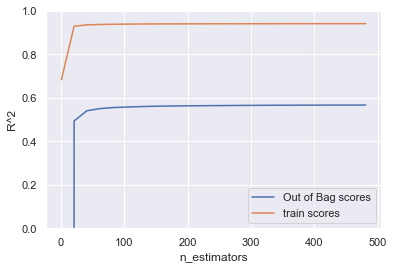

In [38]:
plt.plot(estimator_range, oob_scores, label="Out of Bag scores")
plt.plot(estimator_range, train_scores, label="train scores")
plt.ylabel("R^2")
plt.xlabel("n_estimators")
plt.ylim(0, 1)
plt.legend()
plt.show()
# plt.savefig("images/warm_start_forest.png")

In [40]:
pd.DataFrame({'num_trees': estimator_range,
              'oob_scores': oob_scores})

,num_trees,oob_scores
0,1,-243.520286
1,21,0.493606
2,41,0.540495
3,61,0.550228
4,81,0.554942
5,101,0.557473
6,121,0.559369
7,141,0.560815
8,161,0.561961
9,181,0.562649


If we're looking at R<sup>2</sup> to the precision of the hundredth, we can pick 150 as a nice even number of estimators.
### Parameter Tuning
Let's see if we can improve performance by tuning on the number of features and max depth of the tree.

In [29]:
from sklearn.model_selection import ParameterGrid

rf = RandomForestRegressor(n_estimators=150, oob_score=True, random_state=42)
grid = {
    'max_features': ['auto', 'sqrt'],
    'max_depth': [1, 5, 10, 20, None]
}

best_score=0
for g in ParameterGrid(grid):
    rf.set_params(**g)
    rf.fit(X_train[p1_features], y_train)
    # save if best
    if rf.oob_score_ > best_score:
        best_score = rf.oob_score_
        best_grid = g

In [30]:
print('Best R^2 Value: {}\n\
Best Parameter Grid: {}'.format(best_score, best_grid))

Best R^2 Value: 0.5811125771108108
Best Parameter Grid: {'max_depth': 10, 'max_features': 'auto'}


We'll Use these parameters moving forward with all datasets.

### Feature Importances

In [31]:
rf_p1 = RandomForestRegressor(n_estimators=150, max_depth=10, max_features='auto', oob_score=True, random_state=42)
rf_p1.fit(X_train[p1_features], y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=False)

### Gini Importance

From [A scikit-learn core dev](https://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined)

>In scikit-learn, we implement the importance as described in [1] (often cited, but unfortunately rarely read...). It is sometimes called "gini importance" or "mean decrease impurity" and is defined as the total decrease in node impurity (weighted by the probability of reaching that node (which is approximated by the proportion of samples reaching that node)) averaged over all trees of the ensemble.

Basically what this comes down to is that if splitting on a feature makes the two leaves below it much more pure (They contain a more concentrated distribution of values), it will be more important than a feature that doesn't increase purity as much, averaged across all trees.

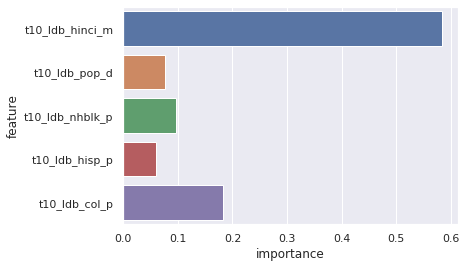

In [32]:
rf_p1_imp = pd.DataFrame({
    'feature': p1_features,
    'importance': rf_p1.feature_importances_ 
})

sns.barplot(x='importance', y='feature', data=rf_p1_imp, orient='h')

This looks different from our results with linear methods in that it gives much more emphasis on the strongest feature, median household income.

### Permutation Importance

<Figure size 1440x720 with 0 Axes>

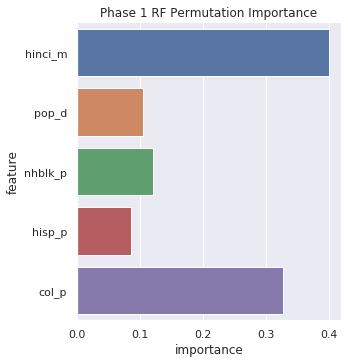

Weight,Feature
0.3990 ± 0.0065,t10_ldb_hinci_m
0.3272 ± 0.0061,t10_ldb_col_p
0.1215 ± 0.0014,t10_ldb_nhblk_p
0.1044 ± 0.0035,t10_ldb_pop_d
0.0866 ± 0.0015,t10_ldb_hisp_p


In [33]:
perm = PermutationImportance(rf_p1, scoring='r2') \
        .fit(X_train[p1_features], y_train, cv='prefit')
    
plt.figure(figsize=(20,10));
plot_perm = perm_plot(perm, p1_features)
plt.title('Phase 1 RF Permutation Importance')    
plt.show()

display(show_weights(perm, feature_names=p1_features))    

This permutation importance shows a much more similar result to the results of the linear methods when compared to gini importance. This is a a good reason to be concerned with the accuracy of gini importance; it can exaggerate the importances of features.

### Partial Dependence Plots

In [36]:
from sklearn.inspection import plot_partial_dependence

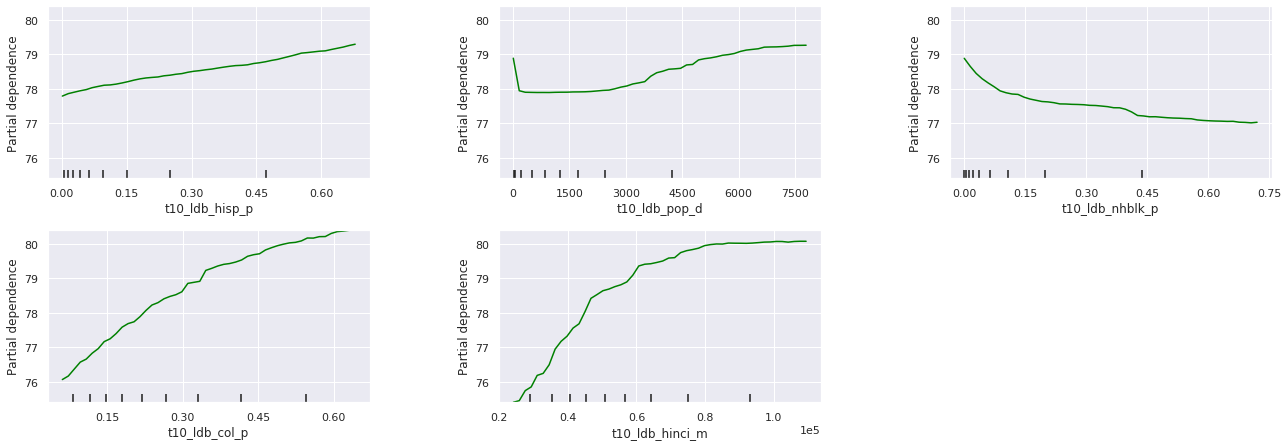

In [37]:
plot_partial_dependence(rf_p1, X_train[p1_features], np.argsort(rf_p1.feature_importances_),
    feature_names=p1_features, n_jobs=-1, grid_resolution=50, fig=plt.figure(figsize=(20,10))) 

We are seeing at least some partial dependence based on all features, with the strongest relationships for percent of college graduates and median household income, which is to be expected. One interesting thing to note is that median household income appears almost asymptotic as we get to very high median incomes, which means that the effect only matters up to a certain point.  The effect of college seems more linear.

### Gradient Boosting with XGBoost

XGBoost is one of the most popular implementation of Gradient Boosted Trees.  This is a method similar to random forests, but rather than using many independent trees it builds trees sequentially, each dependent on the last. It is often done with very shallow trees, or even stumps (trees of depth 1).

![](https://www.researchgate.net/profile/Maria_Peraita-Adrados/publication/326379229/figure/fig5/AS:647978477948928@1531501516288/A-simple-example-of-visualizing-gradient-boosting.png)

In [39]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate

In [41]:
xgb_p1 = XGBRegressor(n_jobs=-1)
cval_xgb_p1 = cross_validate(xgb_p1, X_train[p1_features],
    y_train, scoring = 'r2', cv=cv_5, n_jobs=-1)

In [42]:
print("Mean XGBoost Score: {}".format(cval_xgb_p1['test_score'].mean()))

Mean XGBoost Score: 0.5795957654354658


We're already getting a score that rivals the tuned Random Forest score with no parameter tuning using XGBoost.  For now we won't tune parameters (as we're more interested in feature importance) but we'll revisit tuning later.

In [43]:
xgb_p1.fit(X_train[p1_features].values, y_train.values)

[15:16:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

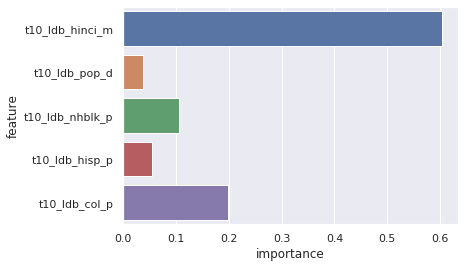

In [44]:
xgb_p1_imp = pd.DataFrame({
    'feature': p1_features,
    'importance': xgb_p1.feature_importances_ 
})

sns.barplot(x='importance', y='feature', data=xgb_p1_imp, orient='h')

<Figure size 1440x720 with 0 Axes>

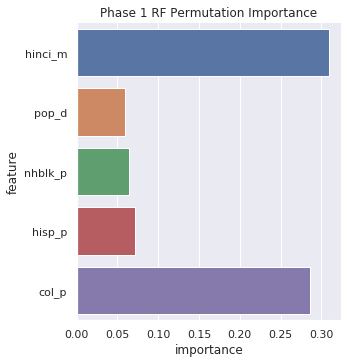

Weight,Feature
0.3090 ± 0.0037,t10_ldb_hinci_m
0.2857 ± 0.0047,t10_ldb_col_p
0.0718 ± 0.0008,t10_ldb_hisp_p
0.0647 ± 0.0029,t10_ldb_nhblk_p
0.0596 ± 0.0025,t10_ldb_pop_d


In [45]:
perm = PermutationImportance(xgb_p1, scoring='r2') \
        .fit(X_train[p1_features].values, y_train.values, cv='prefit')
    
plt.figure(figsize=(20,10));
plot_perm = perm_plot(perm, p1_features)
plt.title('Phase 1 RF Permutation Importance')    
plt.show()

display(show_weights(perm, feature_names=p1_features)) 

Feature importance by Gini importance is the same for XGBoost and Random Forests, but the XGBoost model puts more emphasis on percent college graduates, and less on percentage of the population that is black.  In fact, this is the first model to put higher influence on percentage hispanic than black.

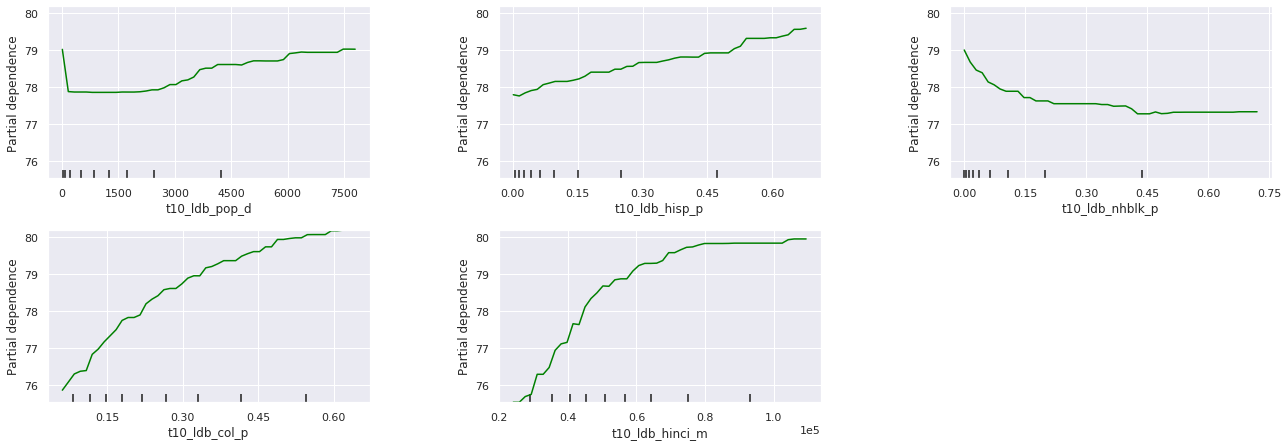

In [46]:
plot_partial_dependence(xgb_p1, X_train[p1_features].values, np.argsort(xgb_p1.feature_importances_),
    feature_names=p1_features, n_jobs=-1, grid_resolution=50, fig=plt.figure(figsize=(20,10))) 

These plots look largely the same as the ones for the random forests. It looks like some tracts may have a population density of zero? We'll check that out.

In [47]:
(X_train['t10_ldb_pop_d'] == 0).value_counts()

False    48924
Name: t10_ldb_pop_d, dtype: int64

No, actually they must just be very small population density values.  In this case it looks like tracts with extremely low population density values have similar life expectancy to those with the highest population density.  However, these values abruptly drop off when they get a little higher, and then slowly climb back up. 

### Phase 1 Conclusions

**Linear models**:  
Perhaps because of the small number of features, we get similar performance from all types of linear models (LASSO, Ridge, ElasticNet). Fully linear models reach an R<sup>2</sup> value of about 0.49, while adding interaction terms and polynomial features up to the order of 3 boost us to an R<sup>2</sup> of around 0.55.  These models all agree that the two most important features are median household income and percent of residents with at least a 4 year degree, with the former slightly outweighing the latter. Both have positive relationships, while the third most important feature (by all measures) is percent non-hispanic black, which has a negative relationship (although it is much less strong than the previous two.

**NonLinear Models**
Random Forests achieved an R<sup>2</sup> of 0.58 with parameter tuning which XGBoost also achieved with no parameter tuning.  Both models had nearly identical Gini importances of features, which largely agreed with the linear models.  However, when using permutation importance college and income became much closer in importance, and in the gradient boosting model percentage hispanic overtook percentage non-hispanic black for third most important feature.  We can see from the partial dependence plots (as well as plotting this directly against life expectancy, as we did at the beginning), that percent hispanic has a positive relationship.

# Phase 2

Features will all Census and ACS variables in the RECVD priority dataset. 

**Full variable names**:
- t10_ldb_hinc_m - Median household income
- t10_ldb_pop_d - Population density
- t10_ldb_nhblk_p - Percent non-hispanic black
- t10_ldb_hisp_p - Percent hispanic
- t10_ldb_col_p - Percent with at least a 4-year degree
- t10_ldb_pop_c - Population count
- t10_ldb_ag25up_c - Count of persons aged 25 and up
- t10_ldb_ag60up_c - Count of persons aged 60 and up
- t10_ldb_ag75up_c - Count of persons aged 75 and up
- t10_ldb_hh_c - Count of housesholds 
- t10_ldb_lep_c - Count of persons who speak english not well
- t10_ldb_mrenti_m - Median montly rent
- t10_ldb_multi_p - Percent of housing units in multi-unit structures
- t10_ldb_nhwht_p - Percent non-hispanic white
- t10_ldb_asian_p - Percent asian
- t10_ldb_fb_p - Percent foreign born
- t10_ldb_hs_p - Percent with a high school diploma or less
- t10_ldb_unemp_p - Percent unemployed
- t10_ldb_npov_c - Count of persons in poverty
- t10_ldb_npov_p - Percentage of persons in poverty
- t10_ldb_vac_p - Percentage vacant housing units
- t10_ldb_own_p - Percentage of owner-occupied housing units
- t10_ldb_mhmvali_m - Median home value

In [49]:
p2_features = [
"t10_ldb_hinci_m",
"t10_ldb_pop_d",
"t10_ldb_nhblk_p",
"t10_ldb_hisp_p",
"t10_ldb_col_p",
"t10_ldb_pop_c",
"t10_ldb_ag25up_c",
"t10_ldb_a60up_c",
"t10_ldb_a75up_c",
"t10_ldb_hh_c",
"t10_ldb_lep_p",
"t10_ldb_mrenti_m",
"t10_ldb_multi_p",
"t10_ldb_nhwht_p",
"t10_ldb_asian_p",
"t10_ldb_fb_p",
"t10_ldb_hs_p",
"t10_ldb_unemp_p",
"t10_ldb_npov_c",
"t10_ldb_npov_p",
"t10_ldb_vac_p",
"t10_ldb_own_p",
"t10_ldb_mhmvali_m"
]

## Linear Models
### LASSO

In [50]:
X_train.columns

Index(['t10_cen_blk_ml', 't10_gis_area_k', 't10_ldb_a60up_c',
       't10_ldb_a75up_c', 't10_ldb_ag25up_c', 't10_ldb_asian_p',
       't10_ldb_col_p', 't10_ldb_fb_p', 't10_ldb_hh_c', 't10_ldb_hinci_m',
       't10_ldb_hisp_p', 't10_ldb_hs_p', 't10_ldb_lep_p', 't10_ldb_mhmvali_m',
       't10_ldb_mrenti_m', 't10_ldb_multi_p', 't10_ldb_nhblk_p',
       't10_ldb_nhwht_p', 't10_ldb_npov_c', 't10_ldb_npov_p', 't10_ldb_own_p',
       't10_ldb_pop_c', 't10_ldb_pop_d', 't10_ldb_unemp_p', 't10_ldb_vac_p',
       't10_net_act_c', 't10_net_amb_c', 't10_net_apa_c', 't10_net_aur_c',
       't10_net_bar_c', 't10_net_cer_c', 't10_net_dra_c', 't10_net_ffa_c',
       't10_net_fin_c', 't10_net_fsa_c', 't10_net_fsr_c', 't10_net_hoi_c',
       't10_net_hsr_c', 't10_net_kct_c', 't10_net_liq_c', 't10_net_mul_c',
       't10_net_ngt_c', 't10_net_pht_c', 't10_net_res_c', 't10_net_srv_c',
       't10_net_wal_c', 't10_use_green_k'],
      dtype='object')

Phase 1 Lasso R^2 Value: 0.6113201286683086
Best Parameters: {'estimator__alpha': 0.001, 'poly__degree': 2}

Best R^2 Value with No Polynomial Features or Interactions: 0.5790055062669685



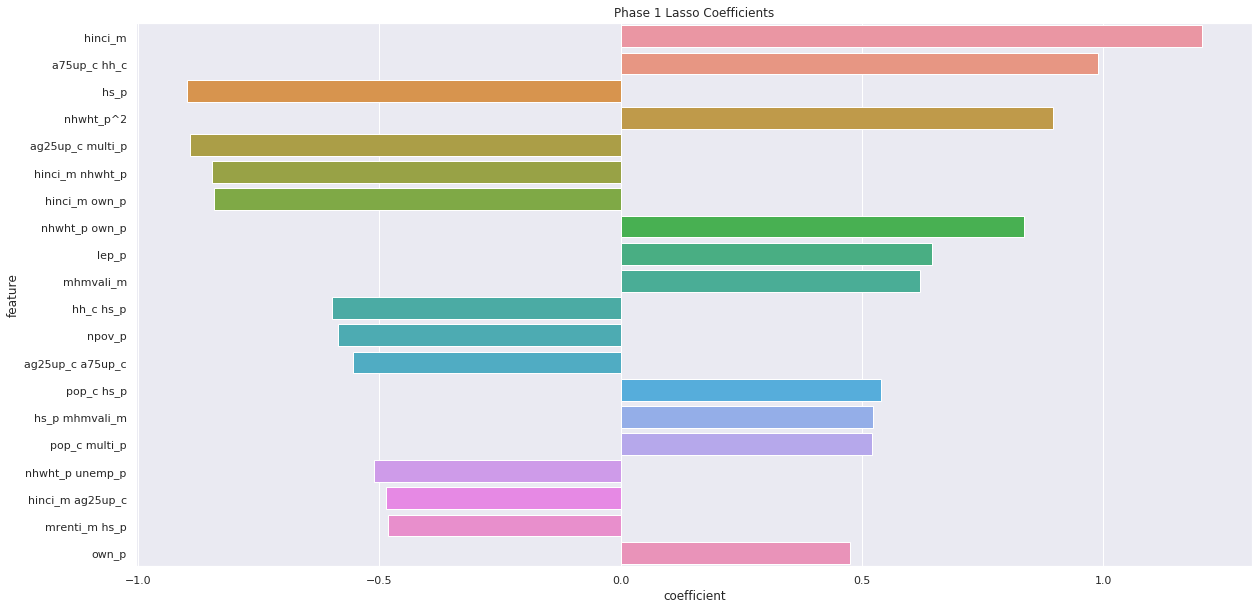

<Figure size 1440x720 with 0 Axes>

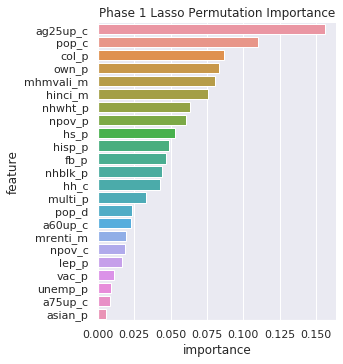

Weight,Feature
0.1562 ± 0.0028,t10_ldb_ag25up_c
0.1098 ± 0.0032,t10_ldb_pop_c
0.0867 ± 0.0026,t10_ldb_col_p
0.0829 ± 0.0033,t10_ldb_own_p
0.0805 ± 0.0016,t10_ldb_mhmvali_m
0.0760 ± 0.0031,t10_ldb_hinci_m
0.0631 ± 0.0019,t10_ldb_nhwht_p
0.0608 ± 0.0013,t10_ldb_npov_p
0.0527 ± 0.0027,t10_ldb_hs_p
0.0486 ± 0.0012,t10_ldb_hisp_p


CPU times: user 2min 24s, sys: 12.2 s, total: 2min 37s
Wall time: 9min


In [57]:
%%time

lasso_grid_linear = {
    'estimator__alpha': np.logspace(-3, 3, 5),
    'poly__degree': [1, 2, 3]
                    }

p2_lasso = linear_model(Lasso(), lasso_grid_linear, cv_5, X_train[p2_features], y_train, '1');

### Ridge

### ElasticNet

## Nonlinear Models
### Random Forests

### Gradient Boosting with XGBoost

In [58]:
X_train.columns

Index(['t10_cen_blk_ml', 't10_gis_area_k', 't10_ldb_a60up_c',
       't10_ldb_a75up_c', 't10_ldb_ag25up_c', 't10_ldb_asian_p',
       't10_ldb_col_p', 't10_ldb_fb_p', 't10_ldb_hh_c', 't10_ldb_hinci_m',
       't10_ldb_hisp_p', 't10_ldb_hs_p', 't10_ldb_lep_p', 't10_ldb_mhmvali_m',
       't10_ldb_mrenti_m', 't10_ldb_multi_p', 't10_ldb_nhblk_p',
       't10_ldb_nhwht_p', 't10_ldb_npov_c', 't10_ldb_npov_p', 't10_ldb_own_p',
       't10_ldb_pop_c', 't10_ldb_pop_d', 't10_ldb_unemp_p', 't10_ldb_vac_p',
       't10_net_act_c', 't10_net_amb_c', 't10_net_apa_c', 't10_net_aur_c',
       't10_net_bar_c', 't10_net_cer_c', 't10_net_dra_c', 't10_net_ffa_c',
       't10_net_fin_c', 't10_net_fsa_c', 't10_net_fsr_c', 't10_net_hoi_c',
       't10_net_hsr_c', 't10_net_kct_c', 't10_net_liq_c', 't10_net_mul_c',
       't10_net_ngt_c', 't10_net_pht_c', 't10_net_res_c', 't10_net_srv_c',
       't10_net_wal_c', 't10_use_green_k'],
      dtype='object')

In [61]:
[x for x in X_train.columns if 'net' in x or 'use' in x]

['t10_net_act_c',
 't10_net_amb_c',
 't10_net_apa_c',
 't10_net_aur_c',
 't10_net_bar_c',
 't10_net_cer_c',
 't10_net_dra_c',
 't10_net_ffa_c',
 't10_net_fin_c',
 't10_net_fsa_c',
 't10_net_fsr_c',
 't10_net_hoi_c',
 't10_net_hsr_c',
 't10_net_kct_c',
 't10_net_liq_c',
 't10_net_mul_c',
 't10_net_ngt_c',
 't10_net_pht_c',
 't10_net_res_c',
 't10_net_srv_c',
 't10_net_wal_c',
 't10_use_green_k']